Импорт необходимых библиотек

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import f
import scipy.stats as sts
import math
%matplotlib inline

# F - распределение

https://en.wikipedia.org/wiki/F-distribution

Получение выборки F - распределения. Построение гистограммы и плотности распределения

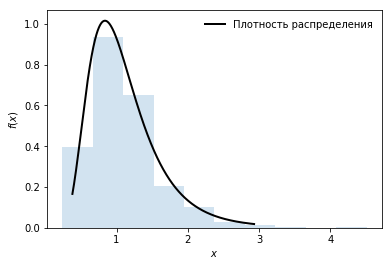

In [2]:
fig, ax = plt.subplots(1, 1)
dfn, dfd = 29,18                                                        #параметры распределения
rv = f(dfn, dfd)
x = np.linspace(f.ppf(0.01, dfn, dfd), f.ppf(0.99, dfn, dfd), 1000)     #генерация плотности распределения
ax.plot(x, rv.pdf(x), 'k-', lw=2, label='Плотность распределения')      
r = f.rvs(dfn, dfd, size=1000)                                          #выборка 1000 значений
ax.hist(r, density=True, alpha=0.2)

ax.legend(loc='best', frameon=False)
plt.ylabel('$f(x)$')
plt.xlabel('$x$')
plt.show()

# Вычисление среднего и дисперсии

Формула для расчета среднего $\frac  {d_{2}}{d_{2}-2}$

Формула для расчета диссперсии $\frac {2\,d_{2}^{2}\,(d_{1}+d_{2}-2)}{d_{1}(d_{2}-2)^{2}(d_{2}-4)}$

In [3]:
M = dfd/(dfd-2)                                                          #Среднее по формуле
D = (2* dfd * dfd *(dfn + dfd - 2))/(dfn * (dfd - 2) ** 2 * (dfd - 4))   #Дисперсия по формуле
print('Среднее по формуле:', M)
print('Дисперсия по формуле: ', D)
Ms = np.array([])
Ds = np.array([])
Dsn = np.array([])

Среднее по формуле: 1.125
Дисперсия по формуле:  0.2805572660098522


# Формируем распределение среднего

In [4]:
def rasp (n):                            # функция для построения гистограммы оценки мат. ожидания и плотности её распределения
    fig, ax = plt.subplots(1, 1)
     
    vb = np.array([])                    # генерация n-мерной выборки 1000 раз
    for i in range(1000):
        mn = np.array(f.rvs(dfn, dfd, size=n))
        sr = 0
        for j in mn:
            sr += j
        vb = np.append(vb,sr/n)
        
        
    norm_rv = sts.norm(M, math.sqrt(D/n))  #построение плотности нормального распределения
    x = np.linspace(0,3,100)
    pdf = norm_rv.pdf(x)
    
    
    plt.plot(x, pdf, 'k-', lw=2, label='Плотность распределения', alpha=0.5)   #построение графика и гистограммы
    ax.hist(vb, density=True,bins=40, histtype='stepfilled', alpha = 0.5)   
    plt.ylabel('fraction of samples')
    plt.xlabel('$x$')
    ax.legend(loc='best', frameon=False)
    plt.show()
    
    

    Mn=0                                   #вычисление мат ожидания 
    global Ms
    for i in vb:
        Mn += i
    Ms = np.append(Ms,Mn/1000)

    Dn=0                                   #вычисление дисперсии
    Dd = np.array([])
    for i in vb:
        Dd = np.append(Dd,(i - Mn/1000)**2)
    global Ds
    global Dsn
    for i in Dd:
        Dn += i     
    Ds = np.append(Ds,Dn/1000)
    Dsn = np.append(Dsn,(np.std(vb)**2)*n)
    

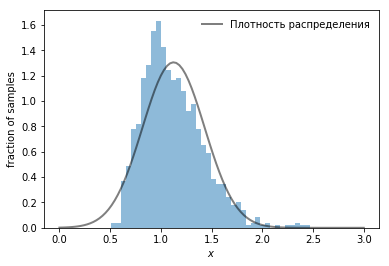

In [5]:
rasp(3)

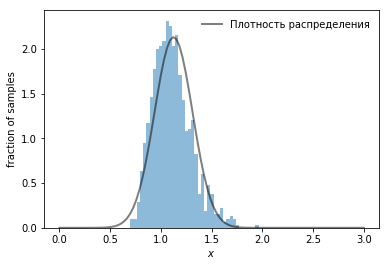

In [6]:
rasp(8)

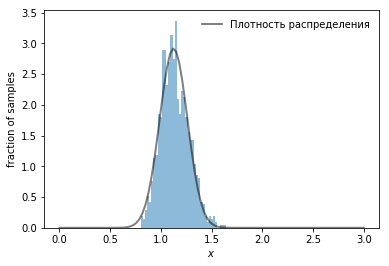

In [7]:
rasp(15)

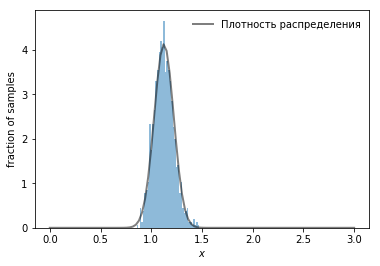

In [8]:
rasp(30)

In [9]:
print('Массив средневыборочных мат. ожиданий: ', Ms)
print('Мат. ожидание по формуле: ', M)
print('Массив средневыборочных дисперсий: ', Ds)
print('Массив оценки дисперсий по средневыборочным: ', Dsn)
print('Дисперсия по формуле:', D)

Массив средневыборочных мат. ожиданий:  [1.1193646  1.11304412 1.13742037 1.1239036 ]
Мат. ожидание по формуле:  1.125
Массив средневыборочных дисперсий:  [0.08825491 0.03574316 0.01936462 0.00947393]
Массив оценки дисперсий по средневыборочным:  [0.26476474 0.28594529 0.2904693  0.28421778]
Дисперсия по формуле: 0.2805572660098522


# Выводы:

При увеличении $n$ оценки становятся более точными.